In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [4]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [6]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()
monthly_revenue.head()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


# Monthly sum of Lodging Revenue and Other Revenue

In [8]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()

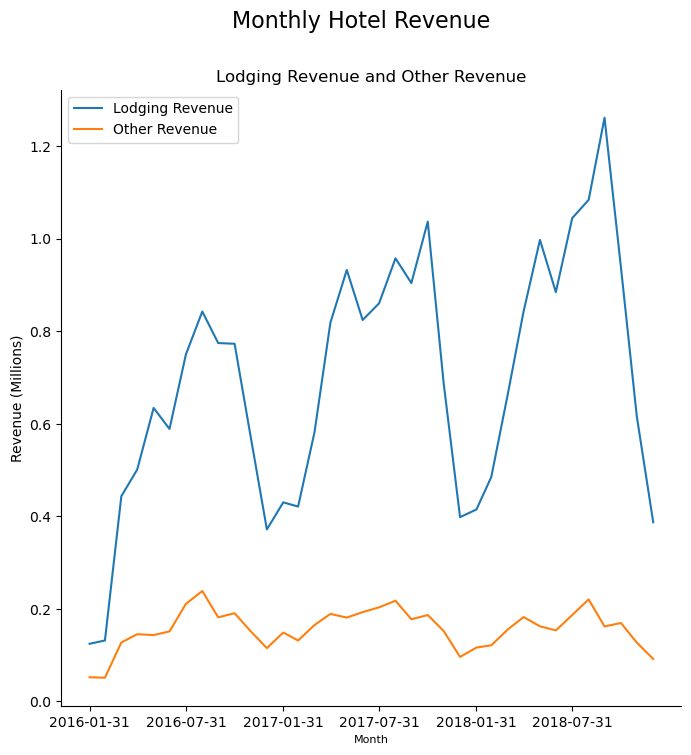

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(monthly_revenue.index, 
        monthly_revenue['LodgingRevenue']/1000000, 
        label = 'Lodging Revenue')
ax.plot(monthly_revenue.index, 
        monthly_revenue['OtherRevenue']/1000000, 
        label = 'Other Revenue')
fig.suptitle('Monthly Hotel Revenue',
            fontsize = 16)
ax.set_title('Lodging Revenue and Other Revenue')
ax.set_xlabel('Month',
             fontsize = 8)
ax.set_ylabel('Revenue (Millions)',
             fontsize = 10)
ax.set_xticks(monthly_revenue.index[::6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper left')
plt.show()

# Nights Booked vs Cancellations

In [11]:
room_nights = (
    hotels
    .groupby("date")
    .agg({"RoomNights":"sum", "BookingsCanceled":"sum"})
)
quarterly_bookings = room_nights.resample("QE").sum()

In [12]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


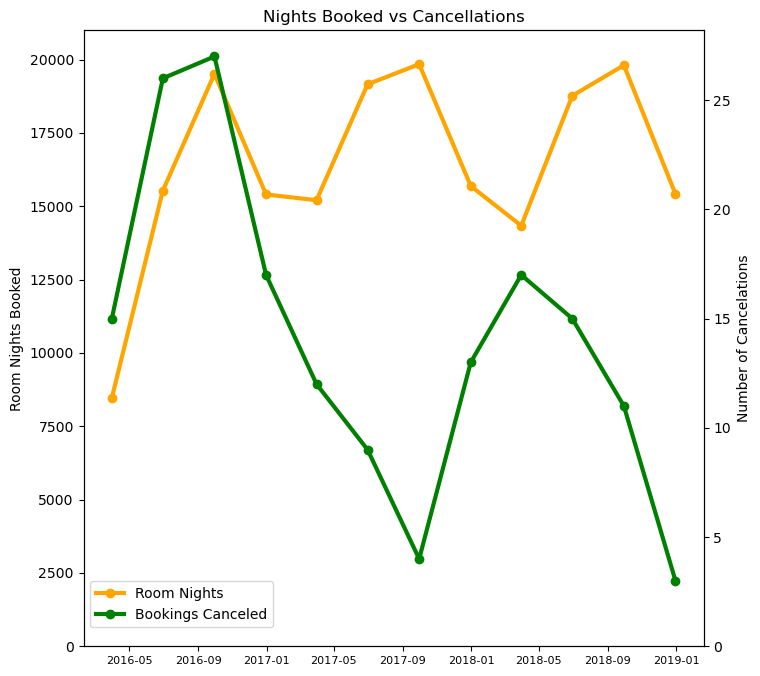

In [13]:
fig, ax1 = plt.subplots(figsize =(8,8))
ax1.plot(quarterly_bookings.index, 
        quarterly_bookings['RoomNights'],
        label = 'Room Nights',
        color = 'orange',
        marker = 'o',
        linewidth = 3
       )
ax1.set_title('Nights Booked vs Cancellations')
ax1.set_ylabel('Room Nights Booked',
             fontsize = 10)
ax1.tick_params(axis='x', labelsize=8)  # Change x-axis font size for first subplot
ax1.set_ylim(0, 21000)

ax2 = ax1.twinx()
ax2.plot(quarterly_bookings.index, 
        quarterly_bookings['BookingsCanceled'],
        label = 'Bookings Canceled',
        color = 'green',
        marker = "o",
        linewidth = 3
       )
ax2.set_ylabel('Number of Cancelations',
             fontsize = 10)
ax2.tick_params(axis='x', labelsize=8)  # Change x-axis font size for first subplot
ax2.set_ylim(0)
fig.legend(bbox_to_anchor=(.37, .2))
plt.show()

# Total room nights booked by country

In [15]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [16]:
countries = (hotels
    .groupby('Nationality')
    .agg({'RoomNights':'sum', 'LodgingRevenue':'sum'})
    .sort_values('RoomNights', ascending = False)
    .iloc[:10]
)

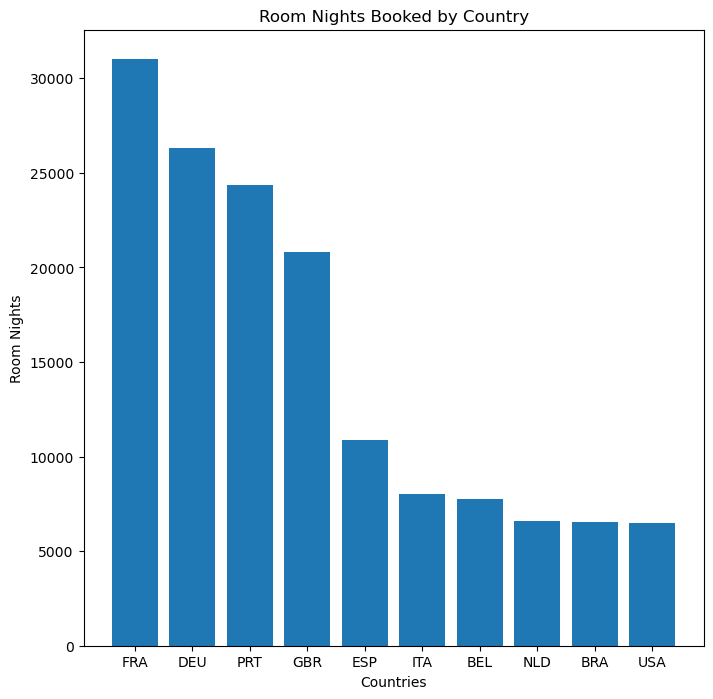

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Room Nights Booked by Country')
ax.set_xlabel('Countries')
ax.set_ylabel('Room Nights')
ax.bar(countries.index, countries['RoomNights'])
plt.show()

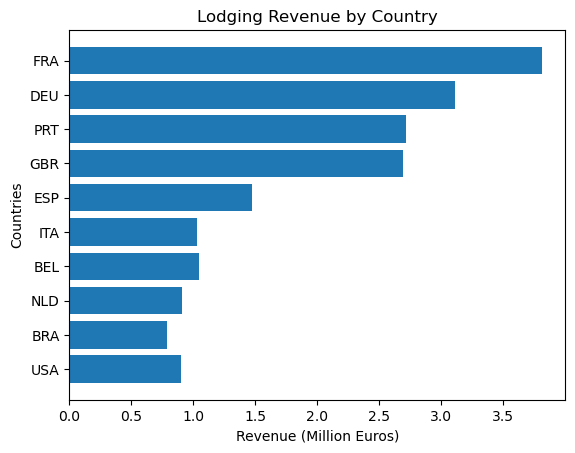

In [18]:
fig,ax = plt.subplots()
ax.barh(countries.index[::-1], 
        countries['LodgingRevenue'][::-1]/1000000)
ax.set_title('Lodging Revenue by Country')
ax.set_ylabel('Countries')
ax. set_xlabel('Revenue (Million Euros)')

plt.show()

# Lodging Revenue and Other Revenue for top 5 countries

In [35]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
country_subset = (hotels
                  .loc[hotels['Nationality'].isin(countries)]
                  .groupby('Nationality')
                  .agg({'LodgingRevenue' : 'sum', 'OtherRevenue' : 'sum'})
                  .sort_values('LodgingRevenue', ascending = False))
country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


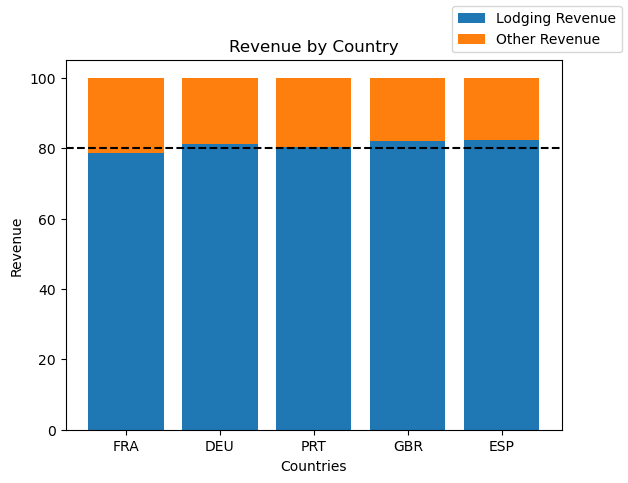

In [53]:
country_subset_pcts = country_subset.apply(lambda x: x * 100 / sum(x), axis=1)

fig, ax = plt.subplots()
x = np.arange(0, len(countries))
ax.set_title('Revenue by Country')
ax
ax.bar(countries, 
       country_subset_pcts['LodgingRevenue'],
       label = 'Lodging Revenue')
ax.set_xlabel('Countries')
ax.set_ylabel('Revenue')

ax.bar(countries,
       country_subset_pcts['OtherRevenue'],
       label = 'Other Revenue',
      bottom = country_subset_pcts['LodgingRevenue'])

ax.axhline(y = 80, color="black", ls="--") 

fig.legend()
plt.show()

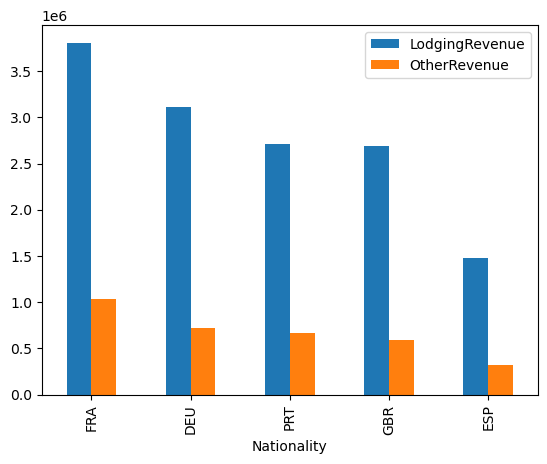

In [43]:
country_subset.plot.bar()
plt.show()

# Lodging Revenue by country

In [139]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]
country_rev = (hotels
                  .loc[hotels['Nationality'].isin(countries)]
                  .groupby('Nationality')
                  .agg({'LodgingRevenue' : 'sum'}))

other_countries = hotels.loc[~hotels['Nationality'].isin(countries), 'LodgingRevenue'].sum().astype(float)

other_df = pd.DataFrame({'LodgingRevenue': [other_countries]}, index=['Other'])

country_rev = pd.concat([country_rev, other_df]).sort_values('LodgingRevenue', ascending = False)

country_rev

,LodgingRevenue
Other,11170126.66
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


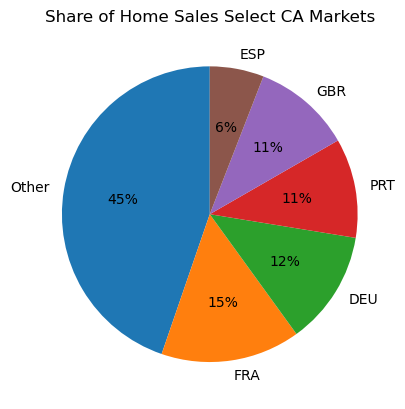

In [141]:
fig, ax = plt.subplots()
ax.pie(
    country_rev['LodgingRevenue'],
    startangle = 90,
    labels = country_rev.index,
    autopct="%.0f%%",
)
ax.set_title("Share of Home Sales Select CA Markets")
plt.show()

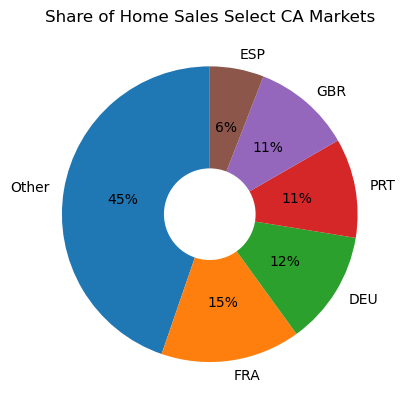

In [147]:
fig, ax = plt.subplots()
ax.pie(
    x = country_rev['LodgingRevenue'],
    startangle = 90,
    labels = country_rev.index,
    autopct="%.0f%%",
)
donut_hole = plt.Circle((0, 0), 0.31, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(donut_hole)

ax.set_title("Share of Home Sales Select CA Markets")
plt.show()

# Average nights stayed and average revenue by country

In [151]:
hotels

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018-12-31
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,0,0,0,1,0,0,0,0,0,2018-12-31
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018-12-31
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,0,0,0,1,0,0,0,0,2018-12-31


In [153]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"], revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])
agg_hotels = hotels.groupby("Nationality").agg(
                                  total_revenue = ("total_revenue", "sum"),
                                  avg_revenue = ("total_revenue", "mean"),
                                  avg_age = ("Age", "mean"),
                                  avg_nights = ("RoomNights", "mean"),
                                  avg_nightly_revenue = ("revenue_per_night", "mean")
)

Text(0.5, 0, 'Avg. Revenue Per Customer')

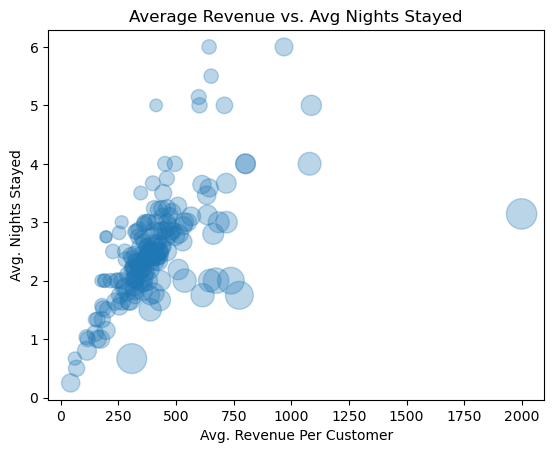

In [155]:
fig, ax = plt.subplots()

ax.scatter(
    agg_hotels["avg_revenue"], 
    agg_hotels["avg_nights"], 
    s=agg_hotels["avg_nightly_revenue"],
    alpha=.3
)

ax.set_title("Average Revenue vs. Avg Nights Stayed")
ax.set_ylabel("Avg. Nights Stayed")
ax.set_xlabel("Avg. Revenue Per Customer")

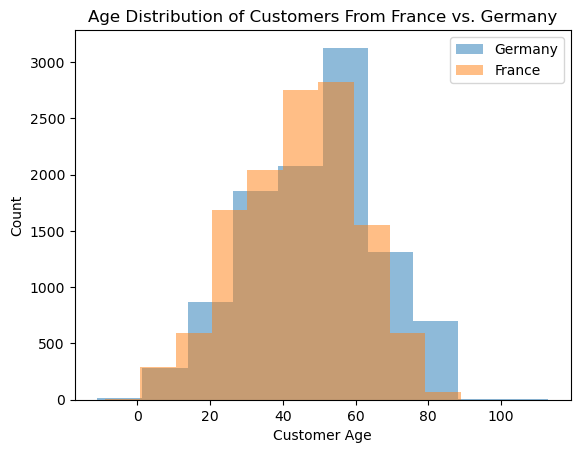

In [157]:
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"] == "DEU", "Age"], alpha=.5)
ax.hist(hotels.loc[hotels["Nationality"] == "FRA", "Age"], alpha=.5)

ax.set_title("Age Distribution of Customers From France vs. Germany")
ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")

ax.legend(["Germany", "France"])